Number diabetes train dataset:  110896
Number diabetes test dataset:  55449
Total number of diabetes:  166345
90536
90536
[0 1 0 ... 0 1 0]
precision: [0.85254733 0.2728346 ]
recall: [0.74139874 0.43074357]
fscore: [0.79309774 0.33406878]
support: [45255 10194]
accuracy: 0.6842864614330285
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     45255
           1       0.27      0.43      0.33     10194

    accuracy                           0.68     55449
   macro avg       0.56      0.59      0.56     55449
weighted avg       0.75      0.68      0.71     55449

AUC Score: 0.5860711575612111
specificity: 0.7413987404706662
sensitivity: 0.43074357465175594


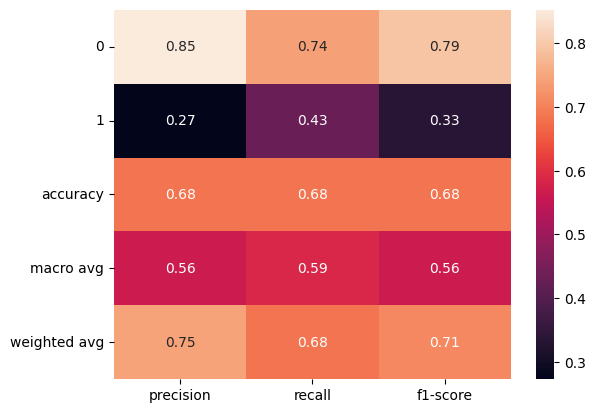

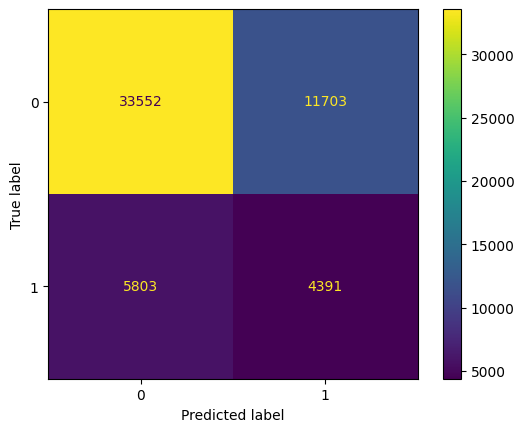

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
import seaborn as sns
import matplotlib.pyplot as plt


# Loading dataset
df = pd.read_csv(r"C:\Users\Roccas\Documents\TMU Data\CIND820 Big Data Analytics Project\LLCP2021XPT\diabetes_health_indicators_BRFSS2021_v21.csv")

# Diabetes is the dependent value
X = df.iloc[:, df.columns != 'Diabetes']
y = df.iloc[:, df.columns == 'Diabetes']

# Splitting Original dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

print("Number diabetes train dataset: ", len(X_train))
print("Number diabetes test dataset: ", len(X_test))
print("Total number of diabetes: ", len(X_train)+len(X_test))

# Apply SMOTE to create observations for Diabetes
sm = SMOTE(sampling_strategy='minority', random_state = 0)
X_train_sampled,y_train_sampled = sm.fit_resample(X_train,y_train.values.ravel())
y.value_counts()

# Confirm values are similar now
print(np.count_nonzero(y_train_sampled == 0))
print(np.count_nonzero(y_train_sampled == 1))

# Decision Tree
SC = StandardScaler()
xtrain = SC.fit_transform(X_train_sampled)
xtest = SC.transform(X_test)

DT = tree.DecisionTreeClassifier()
y_pred = DT.fit(xtrain, y_train_sampled).predict(xtest)
y_pred_DT = DT.predict(xtest)
print(y_pred_DT)

# Calculating Classifier performances
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_DT)
accuracy = accuracy_score(y_test, y_pred_DT)

# Code to print out results
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(accuracy))

# Classification report with tabled results + AUC score
print(classification_report(y_test, y_pred_DT))
print('AUC Score: {}'.format(roc_auc_score(y_test, y_pred_DT)))

# Manually calculating specificity + sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('specificity: {}'.format(specificity))
print('sensitivity: {}'.format(sensitivity))

# Classification report Visualization
clf_report = classification_report(y_test, y_pred_DT, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# Confusion Matrix 
CM_DT = confusion_matrix(y_test, y_pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_DT)
disp.plot()

Number diabetes train dataset:  110896
Number diabetes test dataset:  55449
Total number of diabetes:  166345
90536
90536
DecisionTreeClassifier()
precision: [0.85157003 0.27098546]
recall: [0.74188487 0.42593683]
fscore: [0.79295237 0.33123546]
support: [45255 10194]
accuracy: 0.683799527493733
              precision    recall  f1-score   support

           0       0.85      0.74      0.79     45255
           1       0.27      0.43      0.33     10194

    accuracy                           0.68     55449
   macro avg       0.56      0.58      0.56     55449
weighted avg       0.74      0.68      0.71     55449

AUC Score: 0.5839108500915842
specificity: 0.7418848745994918
sensitivity: 0.4259368255836767


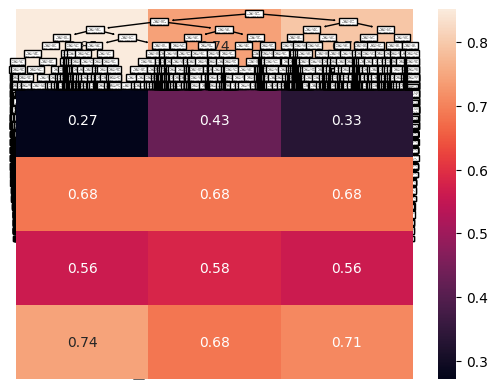

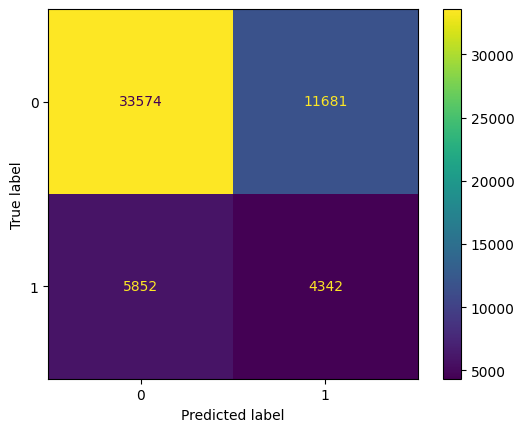

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv(r"C:\Users\Roccas\Documents\TMU Data\CIND820 Big Data Analytics Project\LLCP2021XPT\diabetes_health_indicators_BRFSS2021_v21.csv")

# Diabetes is the dependent value
X = df.iloc[:, df.columns != 'Diabetes']
y = df.iloc[:, df.columns == 'Diabetes']

# Splitting Original dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

print("Number diabetes train dataset: ", len(X_train))
print("Number diabetes test dataset: ", len(X_test))
print("Total number of diabetes: ", len(X_train)+len(X_test))

# Apply SMOTE to create observations for Diabetes
sm = SMOTE(sampling_strategy='minority', random_state = 0)
X_train_sampled,y_train_sampled = sm.fit_resample(X_train,y_train.values.ravel())
y.value_counts()

# Confirm values are similar now
print(np.count_nonzero(y_train_sampled == 0))
print(np.count_nonzero(y_train_sampled == 1))

# Decision Tree
SC = StandardScaler()
xtrain = SC.fit_transform(X_train_sampled)
xtest = SC.transform(X_test)

DT = tree.DecisionTreeClassifier()
y_pred = DT.fit(xtrain, y_train_sampled)
y_pred_DT = DT.predict(xtest)
print(y_pred)

tree.plot_tree(y_pred)

# Calculating Classifier performances
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_DT)
accuracy = accuracy_score(y_test, y_pred_DT)

# Code to print out results
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(accuracy))

# Classification report with tabled results + AUC score
print(classification_report(y_test, y_pred_DT))
print('AUC Score: {}'.format(roc_auc_score(y_test, y_pred_DT)))

# Manually calculating specificity + sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('specificity: {}'.format(specificity))
print('sensitivity: {}'.format(sensitivity))

# Classification report Visualization
clf_report = classification_report(y_test, y_pred_DT, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# Confusion Matrix 
CM_DT = confusion_matrix(y_test, y_pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_DT)
disp.plot()

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_DT)
print('R2: {}'.format(r2))

R2: -1.107360097762669


Number diabetes train dataset:  110896
Number diabetes test dataset:  55449
Total number of diabetes:  166345
90536
90536
DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
precision: [0.85793331 0.30471109]
recall: [0.78117335 0.42574063]
fscore: [0.81775598 0.35519908]
support: [45255 10194]
accuracy: 0.7158289599451748
R2: -0.893895685875
              precision    recall  f1-score   support

           0       0.86      0.78      0.82     45255
           1       0.30      0.43      0.36     10194

    accuracy                           0.72     55449
   macro avg       0.58      0.60      0.59     55449
weighted avg       0.76      0.72      0.73     55449

AUC Score: 0.6034569913775506
specificity: 0.781173351010938
sensitivity: 0.4257406317441632


[Text(0.6, 0.8333333333333334, 'x[1] <= 0.268\ngini = 0.5\nsamples = 181072\nvalue = [90536, 90536]'),
 Text(0.4, 0.5, 'x[24] <= 0.225\ngini = 0.469\nsamples = 113995\nvalue = [42793, 71202]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.388\nsamples = 74354\nvalue = [19579, 54775]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.485\nsamples = 39641\nvalue = [23214, 16427]'),
 Text(0.8, 0.5, 'gini = 0.41\nsamples = 67077\nvalue = [47743, 19334]')]

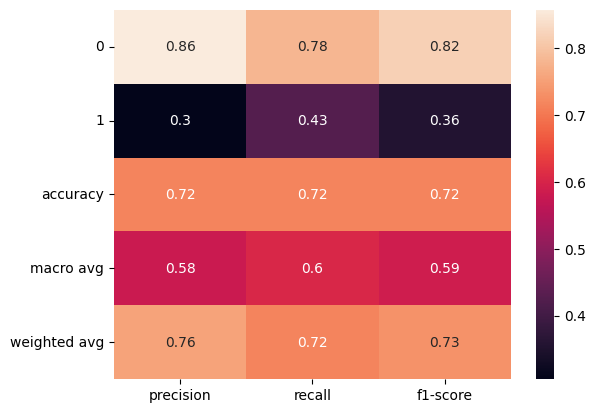

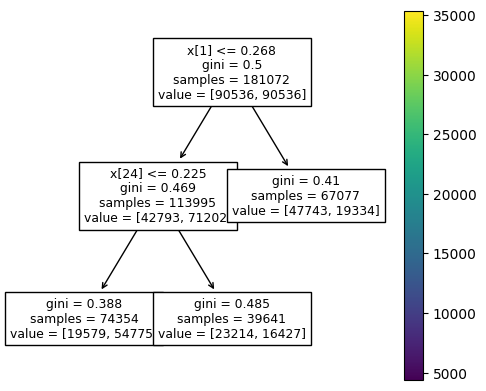

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#r2 = r2_score(y_test, y_pred_DT)
#print('R2: {}'.format(r2))

# Loading dataset
df = pd.read_csv(r"C:\Users\Roccas\Documents\TMU Data\CIND820 Big Data Analytics Project\LLCP2021XPT\diabetes_health_indicators_BRFSS2021_v21.csv")

# Diabetes is the dependent value
X = df.iloc[:, df.columns != 'Diabetes']
y = df.iloc[:, df.columns == 'Diabetes']

# Splitting Original dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

print("Number diabetes train dataset: ", len(X_train))
print("Number diabetes test dataset: ", len(X_test))
print("Total number of diabetes: ", len(X_train)+len(X_test))

# Apply SMOTE to create observations for Diabetes
sm = SMOTE(sampling_strategy='minority', random_state = 0)
X_train_sampled,y_train_sampled = sm.fit_resample(X_train,y_train.values.ravel())
y.value_counts()

# Confirm values are similar now
print(np.count_nonzero(y_train_sampled == 0))
print(np.count_nonzero(y_train_sampled == 1))

# Decision Tree
SC = StandardScaler()
xtrain = SC.fit_transform(X_train_sampled)
xtest = SC.transform(X_test)

DT = tree.DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
y_pred = DT.fit(xtrain, y_train_sampled)
y_pred_DT = DT.predict(xtest)
print(y_pred)

# Calculating Classifier performances
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_DT)
accuracy = accuracy_score(y_test, y_pred_DT)
r2 = r2_score(y_test, y_pred_DT)

# Code to print out results
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(accuracy))
print('R2: {}'.format(r2))

# Classification report with tabled results + AUC score
print(classification_report(y_test, y_pred_DT))
print('AUC Score: {}'.format(roc_auc_score(y_test, y_pred_DT)))

# Manually calculating specificity + sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('specificity: {}'.format(specificity))
print('sensitivity: {}'.format(sensitivity))

# Classification report Visualization
clf_report = classification_report(y_test, y_pred_DT, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

# Confusion Matrix 
CM_DT = confusion_matrix(y_test, y_pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=CM_DT)
disp.plot()

tree.plot_tree(y_pred)

Number diabetes train dataset:  110896
Number diabetes test dataset:  55449
Total number of diabetes:  166345
90536
90536
DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
precision: [0.89439586 0.28550695]
recall: [0.61926859 0.67539729]
fscore: [0.73182833 0.40135241]
support: [45255 10194]
accuracy: 0.6295875489188263
R2: -1.4686630381536223
              precision    recall  f1-score   support

           0       0.89      0.62      0.73     45255
           1       0.29      0.68      0.40     10194

    accuracy                           0.63     55449
   macro avg       0.59      0.65      0.57     55449
weighted avg       0.78      0.63      0.67     55449

AUC Score: 0.6473329408155954
specificity: 0.6192685891061761
sensitivity: 0.6753972925250147


[Text(0.640625, 0.9, 'x[1] <= 0.268\ngini = 0.5\nsamples = 181072\nvalue = [90536, 90536]'),
 Text(0.40625, 0.7, 'x[24] <= 0.225\ngini = 0.469\nsamples = 113995\nvalue = [42793, 71202]'),
 Text(0.25, 0.5, 'x[6] <= -0.304\ngini = 0.388\nsamples = 74354\nvalue = [19579, 54775]'),
 Text(0.125, 0.3, 'x[22] <= 1.51\ngini = 0.275\nsamples = 36364\nvalue = [5989, 30375]'),
 Text(0.0625, 0.1, 'gini = 0.249\nsamples = 33397\nvalue = [4866, 28531]'),
 Text(0.1875, 0.1, 'gini = 0.47\nsamples = 2967\nvalue = [1123, 1844]'),
 Text(0.375, 0.3, 'x[12] <= -0.221\ngini = 0.46\nsamples = 37990\nvalue = [13590, 24400]'),
 Text(0.3125, 0.1, 'gini = 0.495\nsamples = 14826\nvalue = [6679, 8147]'),
 Text(0.4375, 0.1, 'gini = 0.419\nsamples = 23164\nvalue = [6911, 16253]'),
 Text(0.5625, 0.5, 'x[12] <= -0.221\ngini = 0.485\nsamples = 39641\nvalue = [23214, 16427]'),
 Text(0.5, 0.3, 'gini = 0.429\nsamples = 19526\nvalue = [13445, 6081]'),
 Text(0.625, 0.3, 'x[9] <= 2.543\ngini = 0.5\nsamples = 20115\nvalue = [

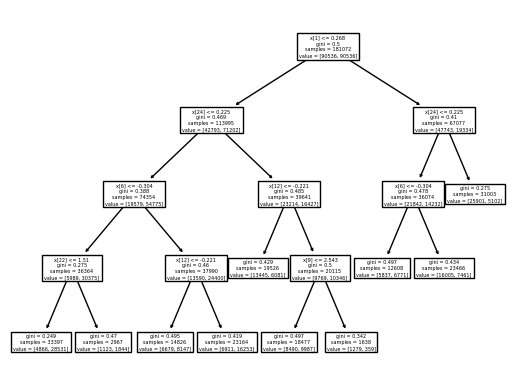

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest,chi2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#r2 = r2_score(y_test, y_pred_DT)
#print('R2: {}'.format(r2))

# Loading dataset
df = pd.read_csv(r"C:\Users\Roccas\Documents\TMU Data\CIND820 Big Data Analytics Project\LLCP2021XPT\diabetes_health_indicators_BRFSS2021_v21.csv")

# Diabetes is the dependent value
X = df.iloc[:, df.columns != 'Diabetes']
y = df.iloc[:, df.columns == 'Diabetes']

# Splitting Original dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

print("Number diabetes train dataset: ", len(X_train))
print("Number diabetes test dataset: ", len(X_test))
print("Total number of diabetes: ", len(X_train)+len(X_test))

# Apply SMOTE to create observations for Diabetes
sm = SMOTE(sampling_strategy='minority', random_state = 0)
X_train_sampled,y_train_sampled = sm.fit_resample(X_train,y_train.values.ravel())
y.value_counts()

# Confirm values are similar now
print(np.count_nonzero(y_train_sampled == 0))
print(np.count_nonzero(y_train_sampled == 1))

# Decision Tree
SC = StandardScaler()
xtrain = SC.fit_transform(X_train_sampled)
xtest = SC.transform(X_test)

DT = tree.DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
y_pred = DT.fit(xtrain, y_train_sampled)
y_pred_DT = DT.predict(xtest)
print(y_pred)

# Calculating Classifier performances
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_DT)
accuracy = accuracy_score(y_test, y_pred_DT)
r2 = r2_score(y_test, y_pred_DT)

# Code to print out results
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(accuracy))
print('R2: {}'.format(r2))

# Classification report with tabled results + AUC score
print(classification_report(y_test, y_pred_DT))
print('AUC Score: {}'.format(roc_auc_score(y_test, y_pred_DT)))

# Manually calculating specificity + sensitivity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_DT).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('specificity: {}'.format(specificity))
print('sensitivity: {}'.format(sensitivity))



tree.plot_tree(y_pred)